<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
BIG MARKET ANALYSIS AND PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT LIBRARIES</h1>

In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
data =pd.read_csv('BIGMARKETTRAIN.csv')

In [3]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
DATA INFO</h1>

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
FOUND MISSING VALUES HERE WE IMMUTE THE  NAN VALUES USING MEAN IMPUTATION</h1>

In [10]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace= True)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
FOR MISSING VALUES IN THE COLUMN OUTLET_SIZE, VALUES ARE STRING TYPE SO WE USE AGGFUNCTION TO CONVERT VALUES AND FILL NAN VALUES WITH MODE</h1>

In [12]:
pviot = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()[0]))
pviot

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE COLUMN OUTLET_SIZE AND OUTLET_TYPE ARE CORRELATED TO EACH OTHER, WE USE THIS FOR IMPUTE THE MODE VALUES USING AS PER THE OUTLET_TYPE VALUES</h1>

In [16]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x : pviot[x])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
We handled missing values above for this dataset, no Dataset is free from the missing values</h1>

In [20]:
data['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Now we are converting the short cut strings to get similar words(caps,shortcut words) using replace</h1>

In [21]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
data.replace({'Item_Fat_Content': {'LF': 'Low Fat','low fat':'Low Fat', 'reg' : 'Regular'}} , inplace =True)

In [23]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Here we are using label encoding for convert string to numeric form for preparation of data using in model</h1>

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder= LabelEncoder()

In [27]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<Axes: >

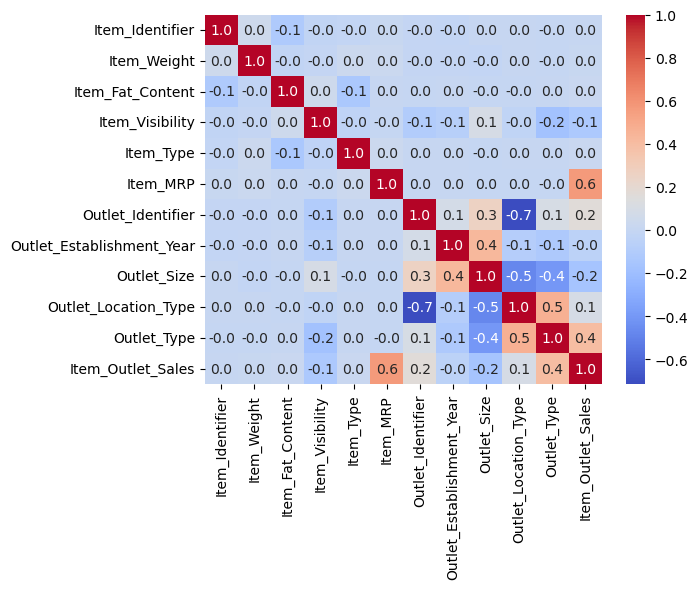

In [46]:
import seaborn as sns
correlation = data.corr()
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt=".1f")

<h1 style="font-family:Arial; font-size:Here all the columns are not correlated to each other so we have totake all columns for train the model</h1>32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Here all the columns are not correlated to each other so we have to take all columns for train the model</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
All the Columns are convert to numeric form which willbe eaiser for calculations in modelling</h1> 

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Data Preparing for model, Making data into 2 parts one for Train and other for Test/validation, we are using XGREGRESSOR ALGORITHM FOR MAKING A MODEL</h1>

In [30]:
x = data.drop('Item_Outlet_Sales', axis =1)

In [31]:
y = data['Item_Outlet_Sales']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y , random_state= 0, test_size = 0.2)

In [34]:
from xgboost import XGBRegressor

In [35]:
il = XGBRegressor()

In [36]:
il.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
pred = il.predict(x_train)

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [39]:
metrics.r2_score(y_train, pred)

0.8786473785846649

In [40]:
testpred = il.predict(x_test)

In [41]:
metrics.r2_score(y_test, testpred)

0.4671694178367427

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
CONCULSION : WE HAVE ACHEIVED THE MODEL ACCURACY TO 88% BY USING THE ALGORITHM XGREGRESSOR<h1>